# Encontrando raízes de equação - Caso do paraquedista

A raiz de uma $f(x)$ é um valor de $x$ (variável independente) que ao ser substituído na expressão da função, o valor desta se iguala a zero, em outras palavras:

$$\Large f(x) = 0$$

Apesar muitas funções possuírem modos analíticos de encontrar suas raízes, uma parcela considerada de outras funções não contêm tal facilidade. Nesse caso são necessários métodos numéricos para determinar tais valores. Existem vários métodos para determinar as raízes de uma equação, como os métodos intervalares, os métodos abertos, entre outros.

## Motivação

Imagine uma função ($v$) que mede a velocidade de um paraquedista de massa m caindo sob a força da aceleração da gravidade:

$$\Large v = \frac{gm}{c}(1-e^{(-\frac{c}{m})t})$$

Sendo $c$ o coeficiente de arrasto e $t$ o tempo em questão. De posse dos valores da massa do paraquedista e do coeficiente de arrasto, é fácil resolver analiticamente essa equação para determinar o valor de $t$ que zera a função, pois $v$ é expressa explicitamente na equação.

Entretanto, se o objetivo fosse determinar o coeficiente de arrasto para que um paraquedista de uma certa massa $m$ atinja uma certa velocidade $v$ num determinado intervalo de tempo, perceberia – se que isso não seria possível, pois não há como isolar a variável $c$ em um dos lados da equação. Dizemos então que $c$  está implícito na equação.

Esse mesmo tipo de problema ocorre com frequência na área da engenharia, e para a resolução destes utilizam – se os métodos numéricos de raízes de equações. Abordaremos um destes, o método da bissecção, logo a seguir.

## Método da bissecção
O método da bissecção se encaixa no grupo dos métodos intervalares que se baseiam numa consequência do Teorema do Valor Intermediário:

Se o valor de um função f(x) muda de sinal em algum ponto do intervalo [a,b], em outras palavras:

$$\Large f(a) \cdot f(b)<0$$

Obrigatoriamente deve existir pelo menos um valor $\varepsilon$ pertencente a esse intervalo [a, b] que é raiz dessa função.

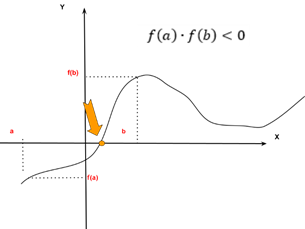

Os métodos de busca incrementais tiram vantagem dessa observação localizando um intervalo no qual a função muda de sinal. Então, a posição da mudança de sinal (e, consequentemente, da raiz) é identificada mais precisamente, dividindo-se o intervalo em diversos subintervalos. Procura-se em cada um desses subintervalos para localizar a mudança de sinal. O processo é repetido e a estimativa da raiz é refinada dividindo-se os subintervalos em incrementos menores.

Na prática, não temos o valor da raiz exata, afinal esse é o intuito do método, e por isso utiliza – se um critério de parada que é o erro em relação ao valor da raiz anteriormente calculado. Como o intervalo diminuí a cada iteração, podemos preestabelecer um valor de erro aceitável para encontrar um valor aproximado da raiz exata.

Podemos utilizar o método acima para resolver o problema do paraquedista mencionado anteriormente.  Para isso, precisamos rearranjar a equação (14) subtraindo $v$ de ambos os lados. Chamamos, então, essa função de $f(c)$:

$$\Large f(c) = \frac{gm}{c}(1-e^{(-\frac{c}{m})t}) - v$$

Imaginando um paraquedista de 68.1 kg caindo a uma velocidade de 40 m/s no tempo t = 10s e adotando a aceleração da gravidade como 9.81m/s², temos que a equação passa a ser:

$$\Large f(c) = \frac{668,06}{c}(1 - e^{-0.146843c})-40$$

In [ ]:
// Algoritmo para encontrar raízes de um função utilizadndo o método da bissecção 
// Escreva aqui a função de uma variável 
function y = f(x); 
    y = (668.06/x)*(1-exp(-0.146843*x)) - 40 
endfunction

function acha_raiz(lim_inf, lim_sup, erro) 
    //encontra a raiz aproximada de uma função, quando fornecido o limite inferior, o superior e o erro aceitável    
    while (1)
        raiz = (lim_inf + lim_sup)/2
        if abs(lim_sup - lim_inf) < erro then //caso o intervalor encontrado seja menor que o erro informado, achamos a raiz
            printf("Raiz aproximada encontrada:")
            x = (lim_inf+lim_sup)/2
            break;
        elseif f(lim_inf)*f(raiz) > 0 then // se esse produto é positivo, significa que a raiz está no intervalor superior
            lim_inf = raiz;
        elseif f(lim_inf)*f(raiz) < 0  // se as duas possibilidades acima não estão corretas, só resta que a raiz está no intervalo inferior
            lim_sup = raiz                
        end
    end
    // Observe que o intervalo vai sempre sendo diminuído
    disp(x);
    printf("Valor da função aplicada na raiz aproximada encontrada:\ny = ")
    disp(f(x))
    
endfunction

//Antes de chutar um valor inicial, vamos plotar a função para termos uma noção onde a raiz se encontra

x = linspace(-20,20,50)
plot(x,f)

while(1)
    a = input("Informe o limite inferior do intervalo: ");
    b = input("Informe o limite superior do intervalo: ");
    erro = input("Informe o erro/Críterio De Parada desejado: ")

    if f(a)*f(b) < 0 then // verifica se raiz se encontra entre o intervalo fornecido
        printf("O intervalo possui uma ou mais raizes\n")
        break // caso a raiz esteja aqui, ele interrompe o loop e vai pra frente no algoritmo
    else
        printf("Esse intervalo não possue raiz, insira um novo!")
    end
end

acha_raiz(a,b,erro);

Como visto no código, a raiz aproximada encontrada foi de $c = 14.801636$, se substituirmos na equação original para calcular a velocidade, verificaremos que o valor (39.999035) se aproxima de $40 m/s$ como estipulado.